In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif

In [2]:
df = pd.read_csv("D:\\Analyst\\EDA\\NYC Bike share\\NYC-BikeShare-2015-2017-combined.csv")

In [3]:
df.shape

(735502, 17)

In [4]:
df.head()

,Unnamed: 0,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Trip_Duration_in_min
0,0,376,2015-10-01 00:16:26,2015-10-01 00:22:42,3212,Christ Hospital,40.734786,-74.050444,3207,Oakland Ave,40.737604,-74.052478,24470,Subscriber,1960.0,1,6
1,1,739,2015-10-01 00:27:12,2015-10-01 00:39:32,3207,Oakland Ave,40.737604,-74.052478,3212,Christ Hospital,40.734786,-74.050444,24481,Subscriber,1960.0,1,12
2,2,2714,2015-10-01 00:32:46,2015-10-01 01:18:01,3193,Lincoln Park,40.724605,-74.078406,3193,Lincoln Park,40.724605,-74.078406,24628,Subscriber,1983.0,1,45
3,3,275,2015-10-01 00:34:31,2015-10-01 00:39:06,3199,Newport Pkwy,40.728745,-74.032108,3187,Warren St,40.721124,-74.038051,24613,Subscriber,1975.0,1,5
4,4,561,2015-10-01 00:40:12,2015-10-01 00:49:33,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,24668,Customer,1984.0,0,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735502 entries, 0 to 735501
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               735502 non-null  int64  
 1   Trip Duration            735502 non-null  int64  
 2   Start Time               735502 non-null  object 
 3   Stop Time                735502 non-null  object 
 4   Start Station ID         735502 non-null  int64  
 5   Start Station Name       735502 non-null  object 
 6   Start Station Latitude   735502 non-null  float64
 7   Start Station Longitude  735502 non-null  float64
 8   End Station ID           735502 non-null  int64  
 9   End Station Name         735502 non-null  object 
 10  End Station Latitude     735502 non-null  float64
 11  End Station Longitude    735502 non-null  float64
 12  Bike ID                  735502 non-null  int64  
 13  User Type                735502 non-null  object 
 14  Birt

In [6]:
duplicate = df[df.duplicated(subset=None,keep='first')] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate.shape 
#duplicate

Duplicate Rows :


(395882, 17)

In [7]:
df = duplicate.drop_duplicates()

In [8]:
df.shape

(332952, 17)

In [9]:
df.isnull().sum()

Unnamed: 0                 0
Trip Duration              0
Start Time                 0
Stop Time                  0
Start Station ID           0
Start Station Name         0
Start Station Latitude     0
Start Station Longitude    0
End Station ID             0
End Station Name           0
End Station Latitude       0
End Station Longitude      0
Bike ID                    0
User Type                  0
Birth Year                 0
Gender                     0
Trip_Duration_in_min       0
dtype: int64

In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11832\1376793381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [12]:
# checks for length of dataframe - df
print(len(df))
adf = df[['Trip_Duration_in_min', 'Start Time', 'Stop Time',
       'Start Station Name', 'End Station Name',
      'Bike ID', 'User Type','Birth Year', 'Gender']]
adf.loc[:,('Birth Year')] = adf['Birth Year'].astype(int)
adf.head()

332952


C:\Users\USER\AppData\Local\Temp\ipykernel_11832\3781205836.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf.loc[:,('Birth Year')] = adf['Birth Year'].astype(int)


,Trip_Duration_in_min,Start Time,Stop Time,Start Station Name,End Station Name,Bike ID,User Type,Birth Year,Gender
19264,6,2015-10-01 00:16:26,2015-10-01 00:22:42,Christ Hospital,Oakland Ave,24470,Subscriber,1960,1
19265,12,2015-10-01 00:27:12,2015-10-01 00:39:32,Oakland Ave,Christ Hospital,24481,Subscriber,1960,1
19266,45,2015-10-01 00:32:46,2015-10-01 01:18:01,Lincoln Park,Lincoln Park,24628,Subscriber,1983,1
19267,5,2015-10-01 00:34:31,2015-10-01 00:39:06,Newport Pkwy,Warren St,24613,Subscriber,1975,1
19268,9,2015-10-01 00:40:12,2015-10-01 00:49:33,Exchange Place,Liberty Light Rail,24668,Customer,1984,0


### EDA

In [13]:
adf.describe()

,Trip_Duration_in_min,Bike ID,Birth Year,Gender
count,332952.000000,332952.000000,332952.000000,332952.000000
mean,14.929870,24919.277091,1979.558942,1.125285
std,573.591031,748.555620,9.376521,0.516336
min,1.000000,14552.000000,1900.000000,0.000000
25%,4.000000,24486.000000,1975.000000,1.000000
50%,6.000000,24604.000000,1982.000000,1.000000
75%,11.000000,24713.000000,1986.000000,1.000000
max,272163.000000,29296.000000,2000.000000,2.000000


<AxesSubplot:ylabel='Gender'>

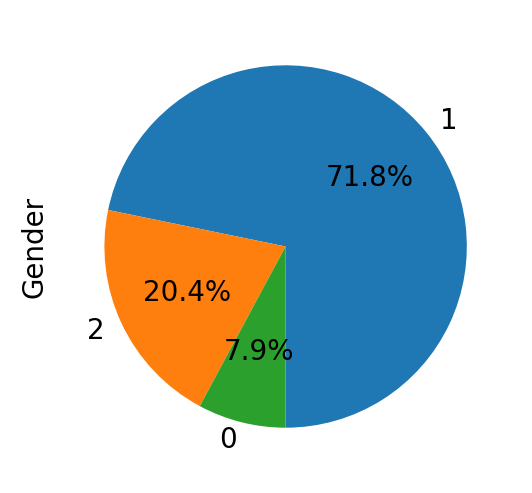

In [14]:
fig = plt.figure(figsize=(3,3), dpi=200)
ax = plt.subplot(111)
df['Gender'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=10)

### 0 = Unknown
### 1 = Male
### 2 = Female

In [15]:
adf['Start Date'] = pd.to_datetime(adf['Start Time'])
adf['Stop Date'] = pd.to_datetime(adf['Stop Time'])

C:\Users\USER\AppData\Local\Temp\ipykernel_11832\3891836313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['Start Date'] = pd.to_datetime(adf['Start Time'])
C:\Users\USER\AppData\Local\Temp\ipykernel_11832\3891836313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adf['Stop Date'] = pd.to_datetime(adf['Stop Time'])


In [17]:
adf['Start Month'] = adf['Start Date'].dt.month
adf['Start Day'] = adf['Start Date'].dt.day
adf['Start Minute'] = adf['Start Date'].dt.minute
adf['Start Week'] = adf['Start Date'].dt.minute
adf['Start Weekday'] = adf['Start Date'].dt.minute
adf['Start Week'] = adf['Start Date'].dt.week
adf['Start Weekofyear'] = adf['Start Date'].dt.weekofyear
adf['Start weekday'] = adf['Start Date'].dt.weekday
adf['Start dayofyear'] = adf['Start Date'].dt.dayofyear
adf['Start weekday_name'] = adf['Start Date'].dt.weekday
adf['Start quarter'] = adf['Start Date'].dt.quarter
adf['Stop Month'] = adf['Stop Date'].dt.month
adf['Stop Day'] = adf['Start Date'].dt.day
adf['Stop Minute'] = adf['Stop Date'].dt.minute
adf['Stop Week'] = adf['Stop Date'].dt.minute
adf['Stop Weekday'] = adf['Stop Date'].dt.minute
adf['Stop Week'] = adf['Stop Date'].dt.week
adf['Stop Weekofyear'] = adf['Stop Date'].dt.weekofyear
adf['Stop weekday'] = adf['Stop Date'].dt.weekday
adf['Stop dayofyear'] = adf['Stop Date'].dt.dayofyear
adf['Stop weekday_name'] = adf['Stop Date'].dt.weekday
adf['Stop quarter'] = adf['Stop Date'].dt.quarter
adf.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_11832\2810143333.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  adf['Start Week'] = adf['Start Date'].dt.week
C:\Users\USER\AppData\Local\Temp\ipykernel_11832\2810143333.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  adf['Start Weekofyear'] = adf['Start Date'].dt.weekofyear
C:\Users\USER\AppData\Local\Temp\ipykernel_11832\2810143333.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  adf['Stop Week'] = adf['Stop Date'].dt.week
C:\Users\USER\AppData\Local\Temp\ipykernel_11832\2810143333.py:18: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  adf['Stop Weekofyear'] = adf['Stop Date'].dt.weekofyear


,Trip_Duration_in_min,Start Time,Stop Time,Start Station Name,End Station Name,Bike ID,User Type,Birth Year,Gender,Start Date,...,Stop Month,Stop Day,Stop Minute,Stop Week,Stop Weekday,Stop Weekofyear,Stop weekday,Stop dayofyear,Stop weekday_name,Stop quarter
19264,6,2015-10-01 00:16:26,2015-10-01 00:22:42,Christ Hospital,Oakland Ave,24470,Subscriber,1960,1,2015-10-01 00:16:26,...,10,1,22,40,22,40,3,274,3,4
19265,12,2015-10-01 00:27:12,2015-10-01 00:39:32,Oakland Ave,Christ Hospital,24481,Subscriber,1960,1,2015-10-01 00:27:12,...,10,1,39,40,39,40,3,274,3,4
19266,45,2015-10-01 00:32:46,2015-10-01 01:18:01,Lincoln Park,Lincoln Park,24628,Subscriber,1983,1,2015-10-01 00:32:46,...,10,1,18,40,18,40,3,274,3,4
19267,5,2015-10-01 00:34:31,2015-10-01 00:39:06,Newport Pkwy,Warren St,24613,Subscriber,1975,1,2015-10-01 00:34:31,...,10,1,39,40,39,40,3,274,3,4
19268,9,2015-10-01 00:40:12,2015-10-01 00:49:33,Exchange Place,Liberty Light Rail,24668,Customer,1984,0,2015-10-01 00:40:12,...,10,1,49,40,49,40,3,274,3,4


In [18]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332952 entries, 19264 to 711099
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Trip_Duration_in_min  332952 non-null  int64         
 1   Start Time            332952 non-null  object        
 2   Stop Time             332952 non-null  object        
 3   Start Station Name    332952 non-null  object        
 4   End Station Name      332952 non-null  object        
 5   Bike ID               332952 non-null  int64         
 6   User Type             332952 non-null  object        
 7   Birth Year            332952 non-null  int32         
 8   Gender                332952 non-null  int64         
 9   Start Date            332952 non-null  datetime64[ns]
 10  Stop Date             332952 non-null  datetime64[ns]
 11  Start Month           332952 non-null  int64         
 12  Start Day             332952 non-null  int64         


In [19]:
cols = adf.columns
dafa = adf[['Trip_Duration_in_min', 'Start Station Name',
       'End Station Name', 'User Type', 'Birth Year', 
      'Start Month', 'Start Day', 'Start Minute',
       'Start Week', 'Start Weekofyear', 
       'Start dayofyear', 'Start quarter', 'Stop Month',
       'Stop Day', 'Stop Minute',
       'Stop Weekofyear', 'Stop weekday', 'Stop dayofyear',
        'Stop quarter', 'Gender']]
dafa.head()

,Trip_Duration_in_min,Start Station Name,End Station Name,User Type,Birth Year,Start Month,Start Day,Start Minute,Start Week,Start Weekofyear,Start dayofyear,Start quarter,Stop Month,Stop Day,Stop Minute,Stop Weekofyear,Stop weekday,Stop dayofyear,Stop quarter,Gender
19264,6,Christ Hospital,Oakland Ave,Subscriber,1960,10,1,16,40,40,274,4,10,1,22,40,3,274,4,1
19265,12,Oakland Ave,Christ Hospital,Subscriber,1960,10,1,27,40,40,274,4,10,1,39,40,3,274,4,1
19266,45,Lincoln Park,Lincoln Park,Subscriber,1983,10,1,32,40,40,274,4,10,1,18,40,3,274,4,1
19267,5,Newport Pkwy,Warren St,Subscriber,1975,10,1,34,40,40,274,4,10,1,39,40,3,274,4,1
19268,9,Exchange Place,Liberty Light Rail,Customer,1984,10,1,40,40,40,274,4,10,1,49,40,3,274,4,0


In [20]:
dafa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332952 entries, 19264 to 711099
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Trip_Duration_in_min  332952 non-null  int64 
 1   Start Station Name    332952 non-null  object
 2   End Station Name      332952 non-null  object
 3   User Type             332952 non-null  object
 4   Birth Year            332952 non-null  int32 
 5   Start Month           332952 non-null  int64 
 6   Start Day             332952 non-null  int64 
 7   Start Minute          332952 non-null  int64 
 8   Start Week            332952 non-null  int64 
 9   Start Weekofyear      332952 non-null  int64 
 10  Start dayofyear       332952 non-null  int64 
 11  Start quarter         332952 non-null  int64 
 12  Stop Month            332952 non-null  int64 
 13  Stop Day              332952 non-null  int64 
 14  Stop Minute           332952 non-null  int64 
 15  Stop Weekofye

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = dafa.apply(le.fit_transform)
data.head()

,Trip_Duration_in_min,Start Station Name,End Station Name,User Type,Birth Year,Start Month,Start Day,Start Minute,Start Week,Start Weekofyear,Start dayofyear,Start quarter,Stop Month,Stop Day,Stop Minute,Stop Weekofyear,Stop weekday,Stop dayofyear,Stop quarter,Gender
19264,5,8,75,1,24,9,0,16,39,39,273,3,9,0,22,39,3,273,3,1
19265,11,42,19,1,24,9,0,27,39,39,273,3,9,0,39,39,3,273,3,1
19266,44,30,60,1,47,9,0,32,39,39,273,3,9,0,18,39,3,273,3,1
19267,4,40,103,1,39,9,0,34,39,39,273,3,9,0,39,39,3,273,3,1
19268,8,17,59,0,48,9,0,40,39,39,273,3,9,0,49,39,3,273,3,0


In [23]:
X = data.iloc[:-10000,:-1]
test_X = data.iloc[-10000:,:-1]
print(len(X), len(test_X))

y = data.iloc[:-10000,-1:]
test_y = data.iloc[-10000:,-1:]
print(len(y),len(test_y))

322952 10000
322952 10000


In [24]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242214, 19) (80738, 19) (242214, 1) (80738, 1)


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

clf = DecisionTreeClassifier()
kf = KFold(n_splits=3, random_state=None, shuffle=True)
model = DecisionTreeClassifier()

In [34]:
results = cross_val_score(model, X, y, cv=kf)
print(results.mean()*100)

80.57853845362963
